 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path('./Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_daily_returns = Path('./Resources/algo_returns.csv')
algo_daily_returns = pd.read_csv(algo_daily_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_daily_returns.dropna(inplace = True)
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_returns = Path('./Resources/sp500_history.csv')
sp500_returns = pd.read_csv(sp500_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [9]:
# Check Data Types
print( f" {sp500_returns['Close'][0]} {type(sp500_returns['Close'][1])}")

 $2933.68 <class 'str'>


In [10]:
# Fix Data Types
sp500_returns_fixed = sp500_returns['Close'].str.removeprefix("$").to_frame().astype(float)
sp500_returns_fixed.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
sp500_returns_fixed = sp500_returns_fixed.pct_change()
sp500_returns_fixed.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_returns_fixed.dropna(inplace=True)
sp500_returns_fixed.isna().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_fixed.columns =['sp500']
sp500_returns_fixed

,sp500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_daily_returns, sp500_returns_fixed], axis=1, join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

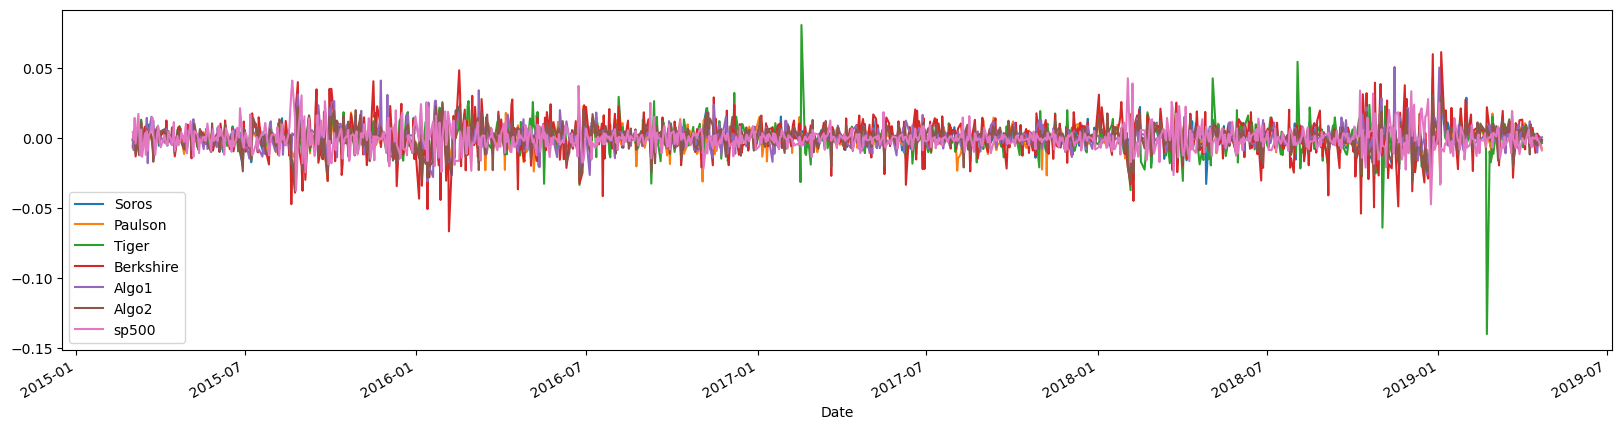

In [15]:
# Plot daily returns of all portfolios
daily_returns = combined_returns
daily_returns.columns = ['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2','sp500']
daily_returns.plot(figsize=(20,5))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

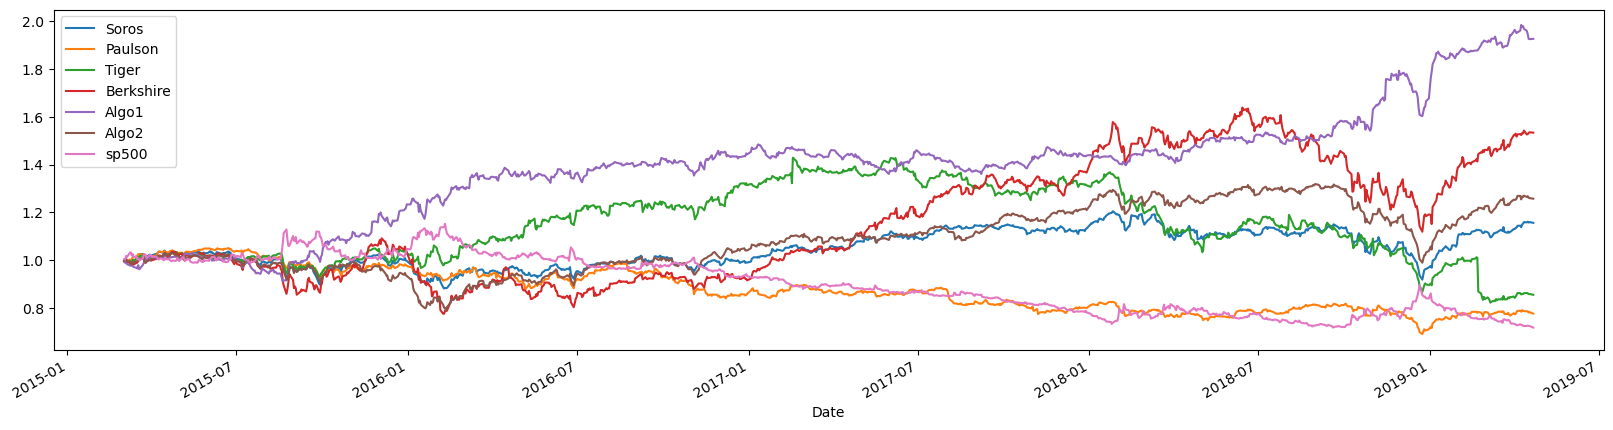

In [16]:
# Calculate cumulative returns of all portfolios
cumultive_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumultive_returns.plot(figsize=(20,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,sp500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


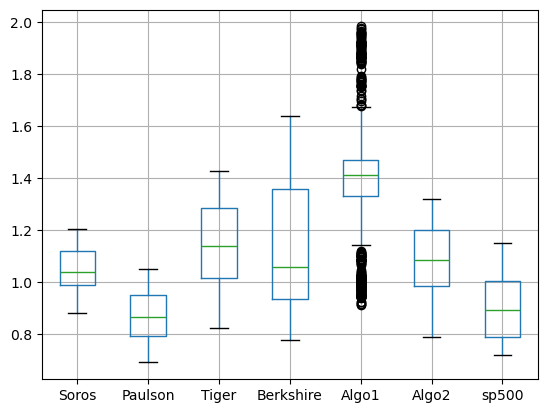

In [17]:
# Box plot to visually show risk
cumultive_returns.columns = ['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2','sp500']
cumultive_returns.boxplot()
cumultive_returns.head()

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
cumultive_returns_std = cumultive_returns.std()
cumultive_returns_std

Soros        0.073187
Paulson      0.088447
Tiger        0.149652
Berkshire    0.241382
Algo1        0.231772
Algo2        0.131642
sp500        0.114846
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate the daily standard deviation of S&P 500
sp500 = cumultive_returns_std['sp500']
index = 0
# Determine which portfolios are riskier than the S&P 500
print(f"The sp500 has a deviation of {sp500}\n")
for risk in cumultive_returns_std:
    if risk == sp500:
        print(f"{cumultive_returns_std.index[index]} Portfolio ({risk}) | has as equal risk as S&P500")
    elif risk > sp500:
        print(f"{cumultive_returns_std.index[index]} Portfolio ({risk}) | has more risk than S&P500")
    elif risk < sp500:
        print(f"{cumultive_returns_std.index[index]} Portfolio ({risk}) | has less risk than S&P500")
    else:
        print(f"{cumultive_returns_std.index[index]} Portfolio ({risk}) | has no enough data to determine risk")
    index += 1

The sp500 has a deviation of 0.114846040967005

Soros Portfolio (0.07318691830466503) | has less risk than S&P500
Paulson Portfolio (0.08844702137512153) | has less risk than S&P500
Tiger Portfolio (0.14965240646521) | has more risk than S&P500
Berkshire Portfolio (0.24138198116487838) | has more risk than S&P500
Algo1 Portfolio (0.23177178454046238) | has more risk than S&P500
Algo2 Portfolio (0.13164225990327413) | has more risk than S&P500
sp500 Portfolio (0.114846040967005) | has as equal risk as S&P500


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annulized_std = cumultive_returns_std * np.sqrt(252)
annulized_std

Soros        1.161806
Paulson      1.404053
Tiger        2.375658
Berkshire    3.831820
Algo1        3.679263
Algo2        2.089756
sp500        1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling std for all portfolios with 21-day window'}, xlabel='Date'>

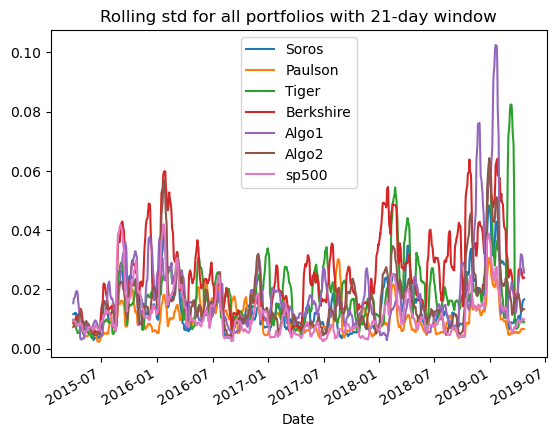

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = cumultive_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(title='Rolling std for all portfolios with 21-day window')

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation for Newly Combined portfolios'}>

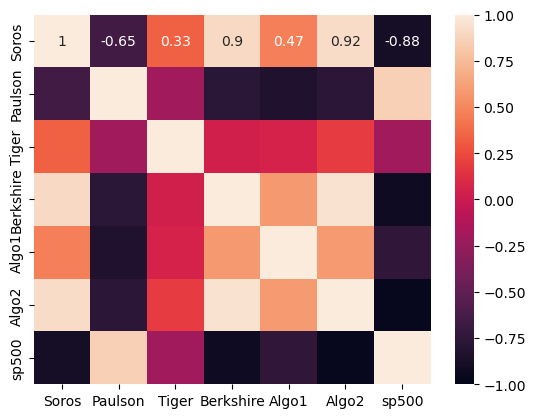

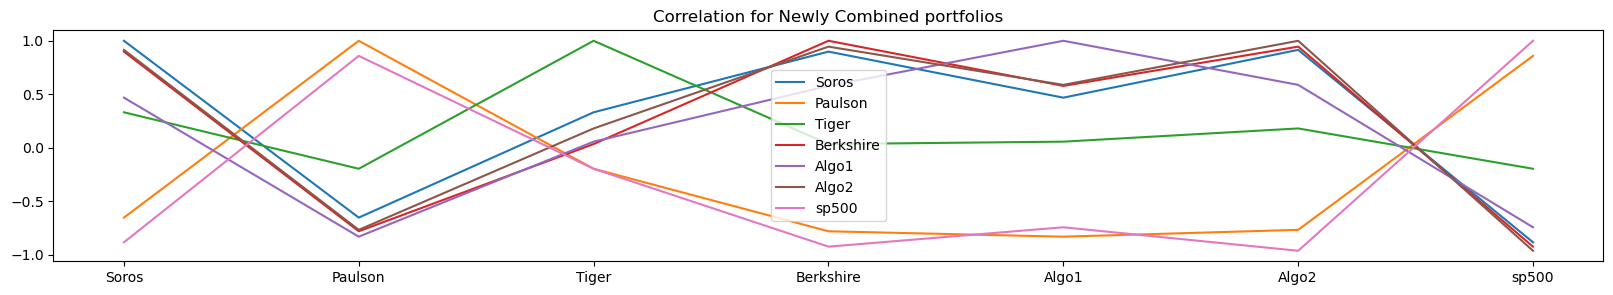

In [22]:
# Calculate the correlation
correlation_matrix = cumultive_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix,  vmin=-1, vmax=1,annot=True)
correlation_matrix.plot(figsize=(20,3), title='Correlation for Newly Combined portfolios')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Beta trend of Algo 1'}, xlabel='Date'>

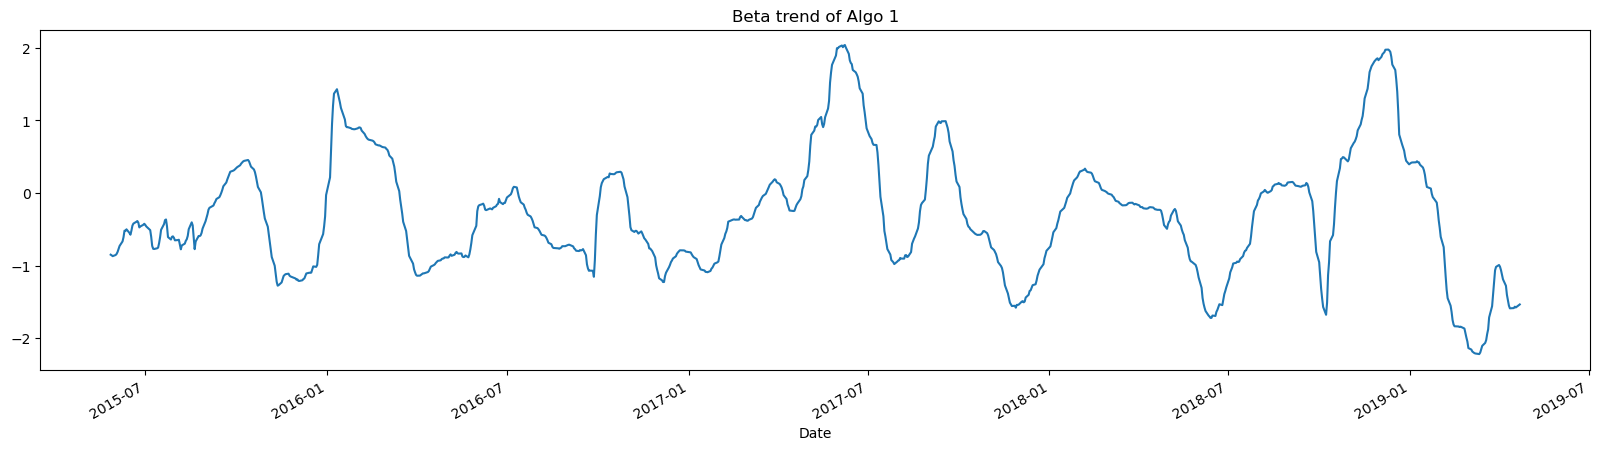

In [23]:
# Calculate covariance of a single portfolio
rolling_covariance_algo1 = cumultive_returns['Algo1'].rolling(window=60).cov(cumultive_returns['sp500'])

# Calculate variance of S&P 500
rolling_variance_SP500 = cumultive_returns['sp500'].rolling(window=60).var()

# Computing beta
algo1_beta = rolling_covariance_algo1 / rolling_variance_SP500

# Plot beta trend
algo1_beta.plot(figsize=(20,5), title='Beta trend of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
cumultive_returns_std.ewm(halflife=21).mean()

Soros        0.073187
Paulson      0.080943
Tiger        0.104606
Berkshire    0.140511
Algo1        0.159988
Algo2        0.154865
sp500        0.148567
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratio = (daily_returns.mean() - daily_returns['sp500'].mean())/(daily_returns.std())
sharpe_ratio

Soros        0.057125
Paulson      0.008971
Tiger        0.017541
Berkshire    0.059935
Algo1        0.123076
Algo2        0.064140
sp500        0.000000
dtype: float64

<Axes: title={'center': 'Daily Sharpe Ratios'}>

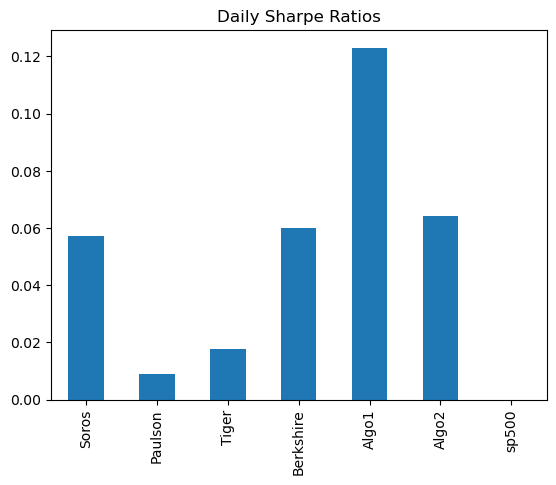

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',  title="Daily Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Yes, both algo 1 & 2 outperformed the S&P 500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
cost_historical = Path('./Resources/cost_historical.csv')
cost_historical = pd.read_csv(cost_historical, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_historical

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [28]:
# Reading data from 2nd stock
goog_historical = Path('./Resources/goog_historical.csv')
goog_historical = pd.read_csv(goog_historical, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_historical

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [29]:
# Reading data from 3rd stock
aapl_historical = Path('./Resources/aapl_historical.csv')
aapl_historical = pd.read_csv(aapl_historical, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_historical

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [30]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([cost_historical, goog_historical, aapl_historical],axis=1,keys=['COST','GOOG','AAPL'])
combined_df

COST           GOOG            AAPL        
           Symbol    NOCP Symbol     NOCP Symbol    NOCP
Trade DATE                                              
2019-05-09   COST  243.47   GOOG  1162.38   AAPL  200.72
2019-05-08   COST  241.34   GOOG  1166.27   AAPL  202.90
2019-05-07   COST  240.18   GOOG  1174.10   AAPL  202.86
2019-05-06   COST  244.23   GOOG  1189.39   AAPL  208.48
2019-05-03   COST  244.62   GOOG  1185.40   AAPL  211.75
...           ...     ...    ...      ...    ...     ...
2018-05-17   COST  199.60   GOOG  1078.59   AAPL  186.99
2018-05-16   COST  198.71   GOOG  1081.77   AAPL  188.18
2018-05-15   COST  195.48   GOOG  1079.23   AAPL  186.44
2018-05-14   COST  195.88   GOOG  1100.20   AAPL  188.15
2018-05-11   COST  195.76   GOOG  1098.26   AAPL  188.59

[250 rows x 6 columns]

In [31]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df.head()

COST           GOOG            AAPL        
           Symbol    NOCP Symbol     NOCP Symbol    NOCP
Trade DATE                                              
2018-05-11   COST  195.76   GOOG  1098.26   AAPL  188.59
2018-05-14   COST  195.88   GOOG  1100.20   AAPL  188.15
2018-05-15   COST  195.48   GOOG  1079.23   AAPL  186.44
2018-05-16   COST  198.71   GOOG  1081.77   AAPL  188.18
2018-05-17   COST  199.60   GOOG  1078.59   AAPL  186.99

In [32]:
# Reorganize portfolio data by having a column per symbol
portfolio_data = pd.concat([cost_historical['NOCP'], goog_historical['NOCP'], aapl_historical['NOCP']], axis=1, keys=['COST', 'GOOG', 'AAPL'])
portfolio_data.sort_index(inplace=True)
portfolio_data.head()

,COST,GOOG,AAPL
Trade DATE,,,
2018-05-11,195.76,1098.26,188.59
2018-05-14,195.88,1100.20,188.15
2018-05-15,195.48,1079.23,186.44
2018-05-16,198.71,1081.77,188.18
2018-05-17,199.60,1078.59,186.99


In [33]:
# Calculate daily returns
portfolio_data = portfolio_data.pct_change()

# Drop NAs
portfolio_data.dropna(inplace=True)

# Display sample data
portfolio_data.head()

,COST,GOOG,AAPL
Trade DATE,,,
2018-05-14,0.000613,0.001766,-0.002333
2018-05-15,-0.002042,-0.019060,-0.009088
2018-05-16,0.016523,0.002354,0.009333
2018-05-17,0.004479,-0.002940,-0.006324
2018-05-18,-0.003206,-0.011339,-0.003637


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<Axes: title={'center': 'Daily Returns for my portfolio'}, xlabel='Trade DATE'>

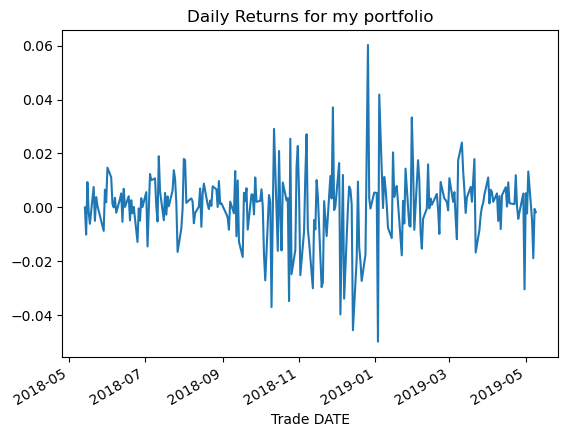

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_data_returns = portfolio_data.dot(weights)

# Display sample data
portfolio_data_returns.plot(title='Daily Returns for my portfolio')

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns['my portfolio'] = portfolio_data_returns
joined_portfolios = combined_returns

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolios.dropna(inplace = True)
joined_portfolios.head()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,sp500,my portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
joined_portfolios_std = joined_portfolios.std()
annulized_std = joined_portfolios_std * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling 21-Day standard deviation'}, xlabel='Date'>

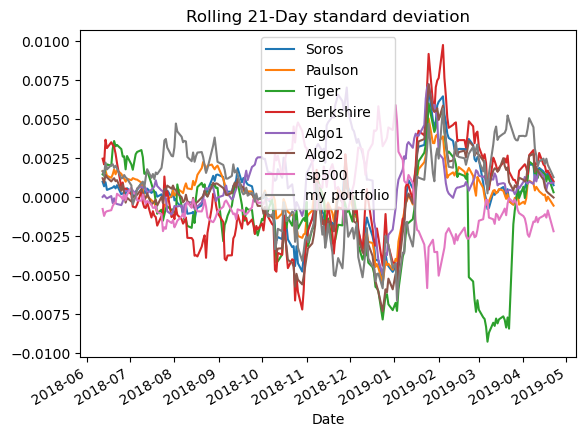

In [38]:
# Calculate rolling standard deviation
joined_portfolios_rolling_std = joined_portfolios.rolling(window=21).mean()

# Plot rolling standard deviation
joined_portfolios_rolling_std.plot(title='Rolling 21-Day standard deviation')

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation for Newly Combined portfolios'}>

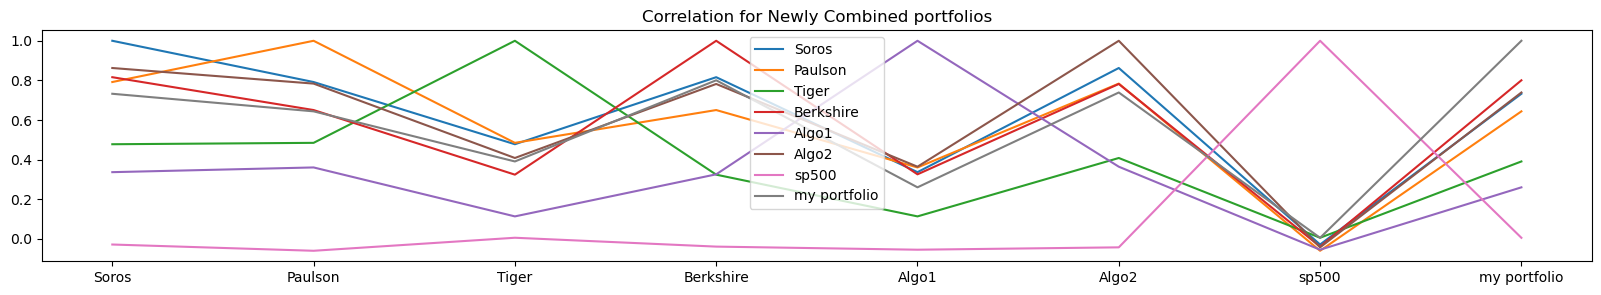

In [39]:
# Calculate and plot the correlation
new_correlation = joined_portfolios.corr()
new_correlation.plot(figsize=(20,3), title='Correlation for Newly Combined portfolios')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling Beta of my portfolio compared to S&P 500'}, xlabel='Date'>

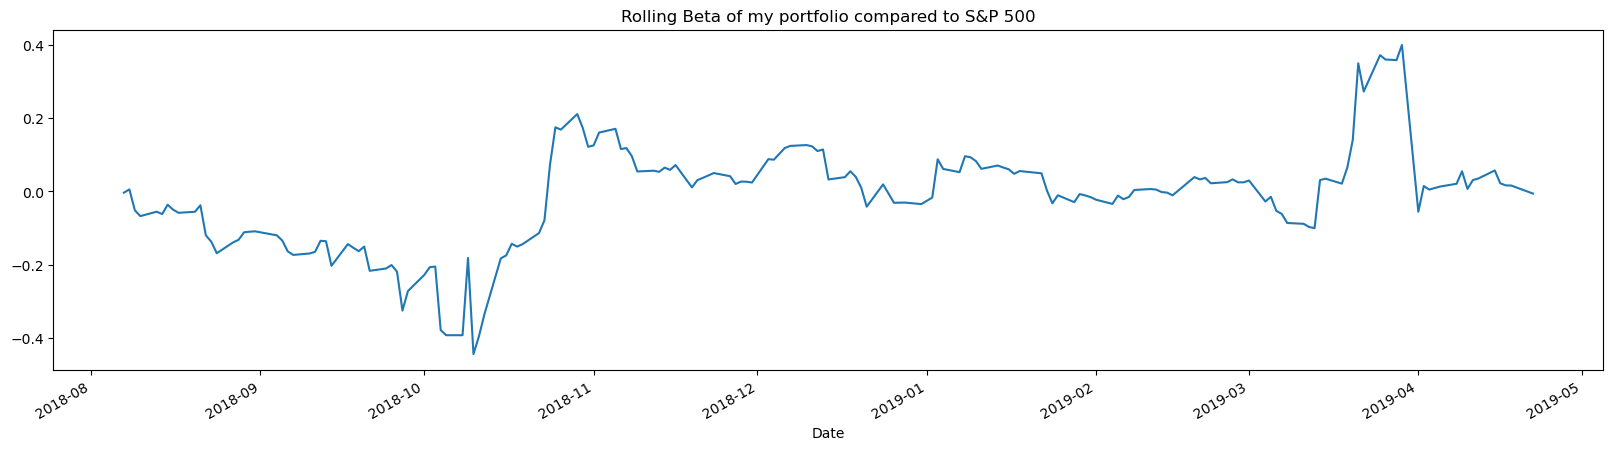

In [40]:
# Calculate and plot Beta
new_covariance = joined_portfolios['my portfolio'].rolling(window=60).cov(joined_portfolios['sp500'])
new_variance = joined_portfolios['sp500'].rolling(window=60).var()

joined_portfolios_rolling_beta = new_covariance / new_variance
joined_portfolios_rolling_beta.plot(figsize=(20, 5), title='Rolling Beta of my portfolio compared to S&P 500')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = ((joined_portfolios.mean()-joined_portfolios['sp500'].mean()) * 252) / (joined_portfolios.std() * np.sqrt(252))

Soros           0.824162
Paulson         0.785247
Tiger          -0.786653
Berkshire       0.366677
Algo1           2.488145
Algo2           0.474771
sp500           0.000000
my portfolio    1.184275
dtype: float64

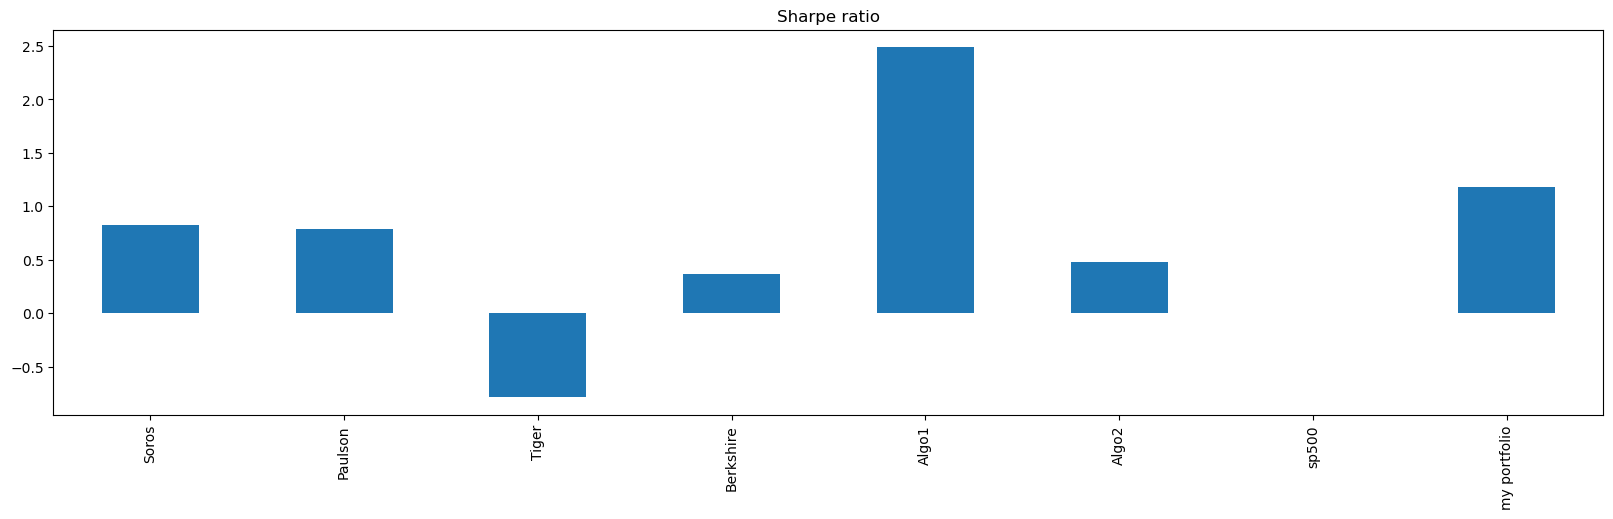

In [42]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe ratio',figsize=(20,5))
sharpe_ratio

### How does your portfolio do?

Write your answer here!

In [47]:
index=0
my_performance = sharpe_ratio['my portfolio']

print(f"My sharp ratio is:\n{my_performance}\n")

for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == 'my portfolio':
        continue
    if performance == my_performance:
        print(f"My portfolio equally performed compared to {joined_portfolios.columns[index]} portfolio ({sharpe_ratio[index]})")
    elif performance < my_performance:
        print(f"My portfolio outperfomed {joined_portfolios.columns[index]} portfolio ({sharpe_ratio[index]})")
    elif performance > my_performance:
        print(f"My portfolio underperformed compared to {joined_portfolios.columns[index]} portfolio ({sharpe_ratio[index]})")
    else:
        print(f"Sorry, you are not eligible to compete with the whales.")
    index+=1

My sharp ratio is:
1.1842745970376571

My portfolio outperfomed Soros portfolio (0.8241620996709792)
My portfolio outperfomed Paulson portfolio (0.7852473055472087)
My portfolio outperfomed Tiger portfolio (-0.7866528462744261)
My portfolio outperfomed Berkshire portfolio (0.36667663992219723)
My portfolio underperformed compared to Algo1 portfolio (2.48814498231444)
My portfolio outperfomed Algo2 portfolio (0.47477066261273937)
My portfolio outperfomed sp500 portfolio (0.0)
